In [1]:
#import necessary libraies
import pandas as pd

In [2]:
# Load the data to check abnormality
df = pd.read_csv("/Users/junaeidshoaib/Documents/ai-operational-assistant/data/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info() # data info at a glance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.isnull().sum() # null value check

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.columns # Columns and columns name check

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.describe() # Statistical Description

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df_raw = df.copy() # To keep the Original dataset safe

In [8]:
#clean up all the column names
df.columns = df.columns.str.strip().str.lower().str.replace('-','_') #("Age":"age" -> "No-show" : "no_show")
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [9]:
#Converting 'scheduledday' and 'appointmentday' to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [10]:
#Creating days_until_appointment (Hypothesis: longer gaps -> higher chance of noshow.)
df['days_until_appointment'] = (df['appointmentday'] - df['scheduledday']).dt.days

In [11]:
df['no_show'].value_counts(normalize=True)

no_show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

In [12]:
#we can see age_min=(-1) not possible (data entry mistake), lets fix
print(len(df[df['age'] < 0]))
df=df[df['age']>=0] #Dropped that row
df.drop(columns=['patientid'], inplace=True) #just an identifier,also float64 — which is weird for an id

1


In [13]:
df.head()

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_until_appointment
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [14]:
#lets check how many infants are there
print(len(df[df['age'] == 0])) # okay fair number
age_zero = df[df['age'] == 0]
print(age_zero['no_show'].value_counts(normalize=True)) # less no_show

3539
no_show
No     0.819441
Yes    0.180559
Name: proportion, dtype: float64


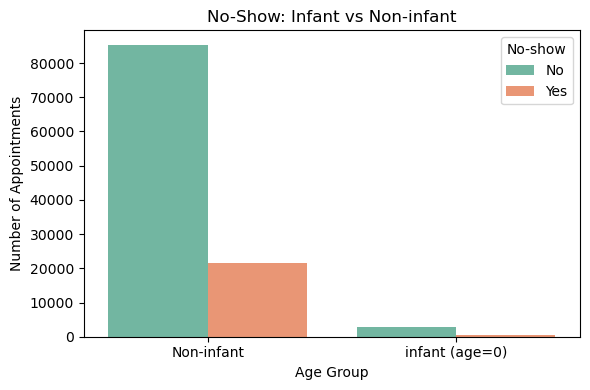

In [15]:
#Just want to see if everything is ok here
df['age_group']= df['age'].apply(lambda x: 'infant (age=0)' if x ==0 else 'Non-infant')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='age_group', hue='no_show', palette='Set2')
plt.title("No-Show: Infant vs Non-infant")
plt.xlabel("Age Group")
plt.ylabel("Number of Appointments")
plt.legend(title="No-show")
plt.tight_layout()
plt.show()

#looks just fine

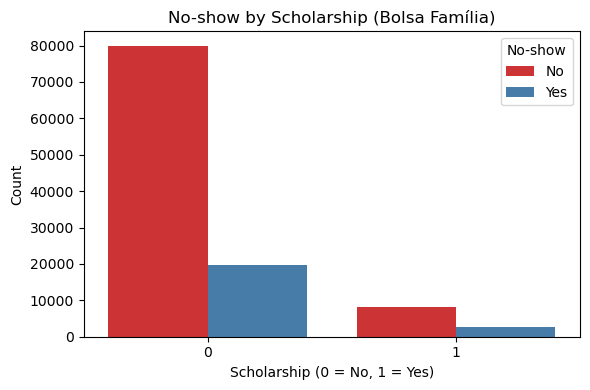

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='scholarship', hue='no_show', palette='Set1')
plt.title("No-show by Scholarship (Bolsa Família)")
plt.xlabel("Scholarship (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="No-show")
plt.tight_layout()
plt.show()

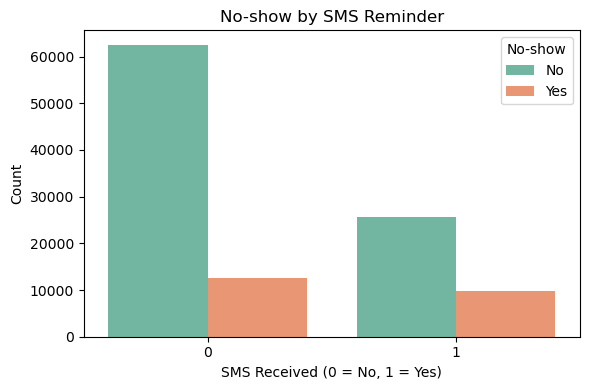

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sms_received', hue='no_show', palette='Set2')
plt.title("No-show by SMS Reminder")
plt.xlabel("SMS Received (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="No-show")
plt.tight_layout()
plt.show()

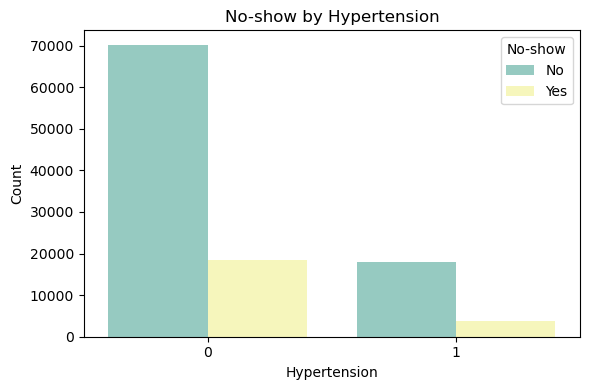

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hipertension', hue='no_show', palette='Set3') #hipertension instead Hipertension(minor mistake, so ojkay)
plt.title("No-show by Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.legend(title="No-show")
plt.tight_layout()
plt.show()

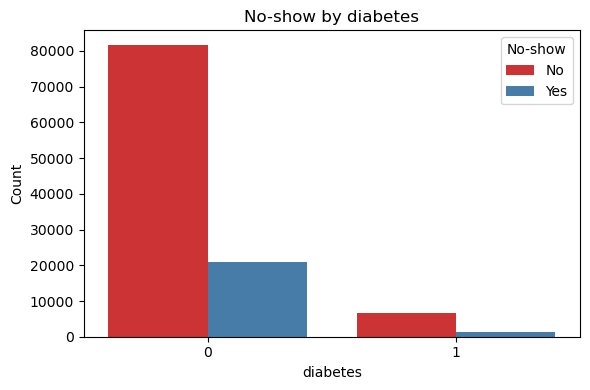

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diabetes', hue='no_show', palette='Set1') 
plt.title("No-show by diabetes")
plt.xlabel("diabetes")
plt.ylabel("Count")
plt.legend(title="No-show")
plt.tight_layout()
plt.show()

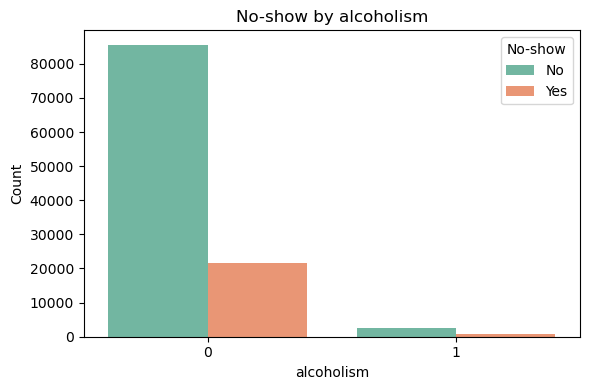

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='alcoholism', hue='no_show', palette='Set2') 
plt.title("No-show by alcoholism")
plt.xlabel("alcoholism")
plt.ylabel("Count")
plt.legend(title="No-show")
plt.tight_layout()
plt.show()

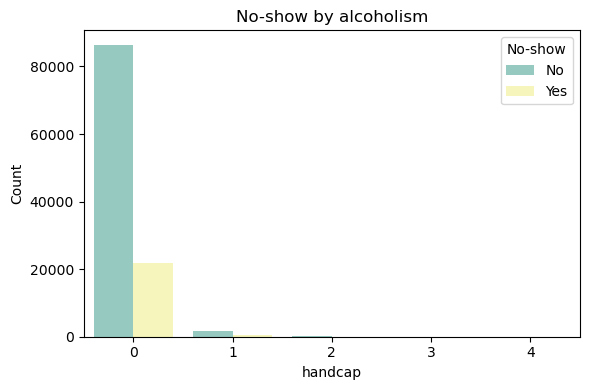

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='handcap', hue='no_show', palette='Set3') 
plt.title("No-show by alcoholism")
plt.xlabel("handcap")
plt.ylabel("Count")
plt.legend(title="No-show")
plt.tight_layout()
plt.show()

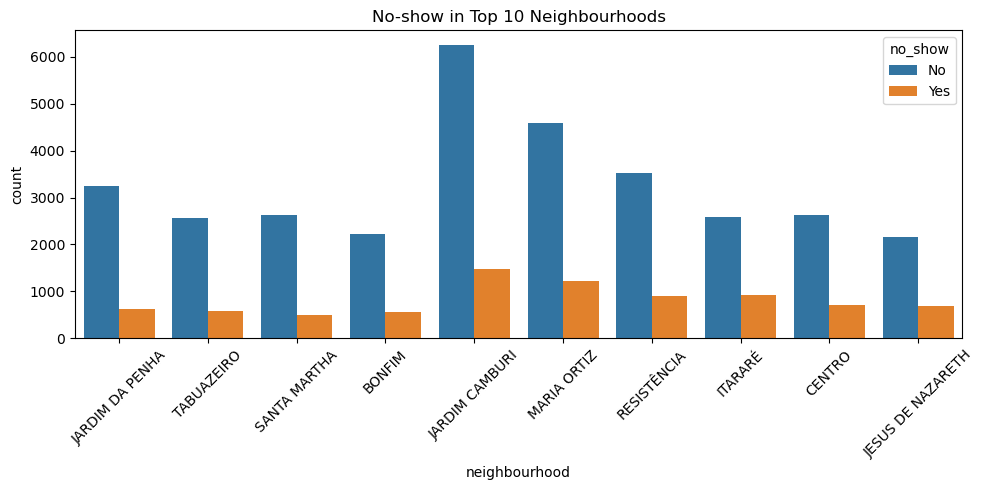

In [22]:
top_neigh = df['neighbourhood'].value_counts().head(10).index
top_neigh_df = df[df['neighbourhood'].isin(top_neigh)]

plt.figure(figsize=(10,5))
sns.countplot(data=top_neigh_df, x='neighbourhood', hue='no_show')
plt.title("No-show in Top 10 Neighbourhoods")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From our visual exploration of the dataset, we observed the following:

1.Infants (Age = 0)
No-show rates among infants are slightly lower than non-infants, suggesting no abnormal behaviour. These rows were retained as valid.

2.Scholarship (Bolsa Familia)
Patients receiving the government scholarship (likely low-income) have a slightly higher no-show rate, indicating socioeconomic status may influence attendance.

3.SMS Reminders
Patients who did not receive SMS reminders had a noticeably higher no-show rate, supporting the effectiveness of reminders.

4.Conditions (Hypertension, Diabetes, Alcoholism)
Interestingly, patients with chronic conditions (like hypertension or diabetes) showed slightly lower no-show rates, possibly reflecting greater health consciousness.

5.Handcap (Disability)
Most patients had no disability; no significant pattern was observed beyond the first class. Further encoding or grouping may be needed.

6.Neighbourhood
Some neighbourhoods had significantly higher appointment volumes and no-show counts like Jardim Camburi. Locality may influence attendance and could be useful as a feature.



In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   appointmentid           110526 non-null  int64              
 1   gender                  110526 non-null  object             
 2   scheduledday            110526 non-null  datetime64[ns, UTC]
 3   appointmentday          110526 non-null  datetime64[ns, UTC]
 4   age                     110526 non-null  int64              
 5   neighbourhood           110526 non-null  object             
 6   scholarship             110526 non-null  int64              
 7   hipertension            110526 non-null  int64              
 8   diabetes                110526 non-null  int64              
 9   alcoholism              110526 non-null  int64              
 10  handcap                 110526 non-null  int64              
 11  sms_received            110526 

In [24]:
# Convert gender and no_show
df['gender'] = df['gender'].map({'F': 1, 'M': 0})
df['no_show'] = df['no_show'].map({'No': 0, 'Yes': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   appointmentid           110526 non-null  int64              
 1   gender                  110526 non-null  int64              
 2   scheduledday            110526 non-null  datetime64[ns, UTC]
 3   appointmentday          110526 non-null  datetime64[ns, UTC]
 4   age                     110526 non-null  int64              
 5   neighbourhood           110526 non-null  object             
 6   scholarship             110526 non-null  int64              
 7   hipertension            110526 non-null  int64              
 8   diabetes                110526 non-null  int64              
 9   alcoholism              110526 non-null  int64              
 10  handcap                 110526 non-null  int64              
 11  sms_received            110526 

In [25]:
len(df[df['days_until_appointment'] < 0]) #Wait, just noticed something.... 
                                          #then the appointment happened before it was scheduled? 
                                          # which makes no sense.

38567

In [26]:
df[['scheduledday', 'appointmentday']].head() #checking if its like (11:59 pm -> 00:00 am)=nope.

,scheduledday,appointmentday
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00


In [27]:
df.head() #Dropping them, well better dropped then having a broken dataset

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_until_appointment,age_group
0,5642903,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1,Non-infant
1,5642503,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1,Non-infant
2,5642549,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1,Non-infant
3,5642828,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1,Non-infant
4,5642494,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1,Non-infant


In [28]:
df = df[df['days_until_appointment'] >= 0]
df.drop(columns=['age_group'], inplace=True) #served it purpose already
df.head()

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_until_appointment
5,5626772,1,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1
6,5630279,1,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1
7,5630575,1,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1
9,5629123,1,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1
10,5630213,1,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1


In [29]:
# more mapping and cleaning
neighbourhood_freq = df['neighbourhood'].value_counts().to_dict()
df['neighbourhood_freq'] = df['neighbourhood'].map(neighbourhood_freq)
df.drop(columns=['neighbourhood'], inplace=True)
df.drop(columns=['appointmentid'], inplace=True) #unique id unnecessary

Applied frequency encoding (will try one hot encoding if needed and for top 10 locations) to the neighbourhood column, converting categorical location names into numeric values based on how often they appear. This preserves information about how busy or common each area is, which can act as a proxy for hospital volume or accessibility. The model will now treat this frequency as a numeric feature to help detect patterns in no-shows related to location density

In [30]:
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_until_appointment,neighbourhood_freq
5,1,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,0,1,592
6,1,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,1,1,533
7,1,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,1,1,533
9,1,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,0,1,472
10,1,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,0,0,0,1,1186


In [31]:
df.to_csv("noshowappointments_cleaned.csv", index=False)